In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

#Set visualization style for consistency
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#Ensure project root is in path to import packages
project_root = os.path.abspath("..")
sys.path.append(project_root)

import src.data_processing as dp
import src.visualization as vz

In [2]:
#Create directory for saving figures if it does not exist
os.makedirs("../reports/figures", exist_ok=True)

#Load cleaned data produced in preprocessing step
house_df = dp.load_csv('../data/housing_data_cleaned.csv')

#Preview dataset to ensure it loaded correctly
print("Dataset shape:", house_df.shape)
print("\nFirst 5 rows of cleaned dataset:")
print(house_df.head())

Dataset shape: (2930, 87)

First 5 rows of cleaned dataset:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

      Alley Lot Shape Land Contour  ... Mo Sold Yr Sold Sale Type  \
0  No Alley       IR1          Lvl  ...       5    2010       WD    
1  No Alley       Reg          Lvl  ...       6    2010       WD    
2  No Alley       IR1          Lvl  ...       6    2010       WD    
3  No Alley       Reg          Lvl  ...       4    2010       WD    
4  No Alley       IR1          Lvl  ...       3    2010       WD    

  Sale Condition SalePrice Total House Area Has Garage Has Bas

In [3]:
#Select numerical features only
numeric_features = dp.get_numeric_features(house_df)

#Display descriptive statistics to understand central tendency and spread
print("\nDescriptive statistics for numerical features:")
print(dp.describe_numeric(house_df))


Descriptive statistics for numerical features:
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2930.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.019795   10147.921843   
std     845.96247  1.887308e+08    42.638025     21.326422    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     60.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     78.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2930.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.096928   
std        1.41102

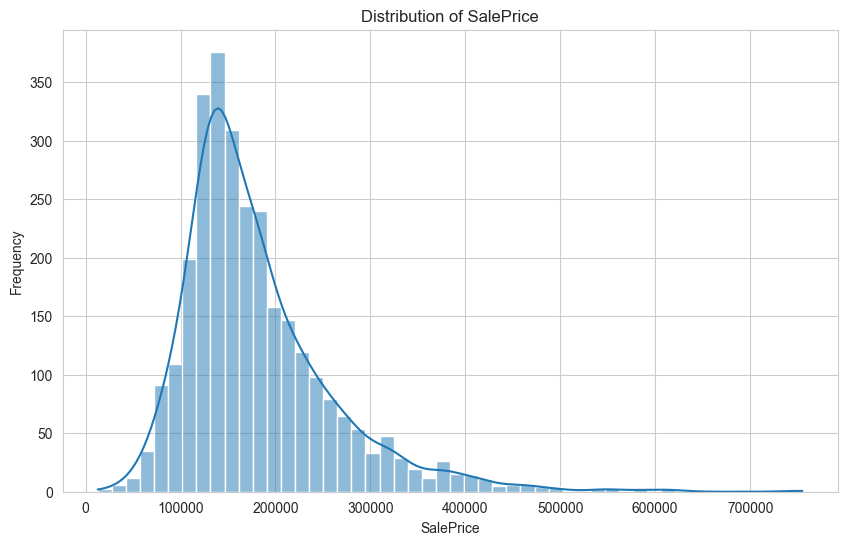

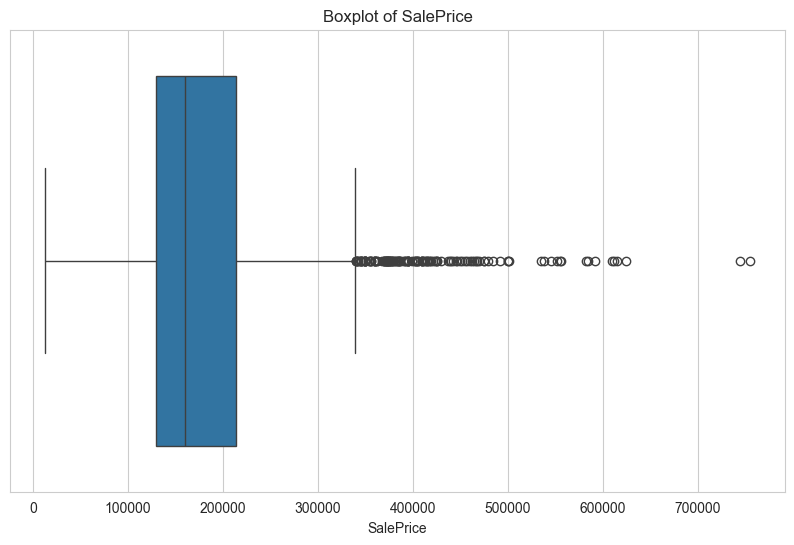

In [4]:
#Distribution of SalePrice (histogram + KDE)
vz.plot_distribution(
    house_df,
    column="SalePrice",
    bins=50,
    save_path="../reports/figures/saleprice_distribution.png"
)

#Boxplot of SalePrice to identify outliers
vz.plot_box(
    house_df,
    column="SalePrice",
    save_path="../reports/figures/saleprice_boxplot.png"
)

In [5]:
#Compute correlation matrix for numerical variables
corr_matrix = numeric_features.corr()

#Display strongest correlations with SalePrice
saleprice_corr = corr_matrix["SalePrice"].sort_values(ascending=False)
print("\nTop features correlated with SalePrice:")
print(saleprice_corr.head(10))


Top features correlated with SalePrice:
SalePrice           1.000000
SalePrice_log       0.946304
Overall Qual        0.799262
Total House Area    0.790073
Gr Liv Area         0.706780
Garage Cars         0.647562
Garage Area         0.640138
Total Bsmt SF       0.632529
1st Flr SF          0.621676
Year Built          0.558426
Name: SalePrice, dtype: float64


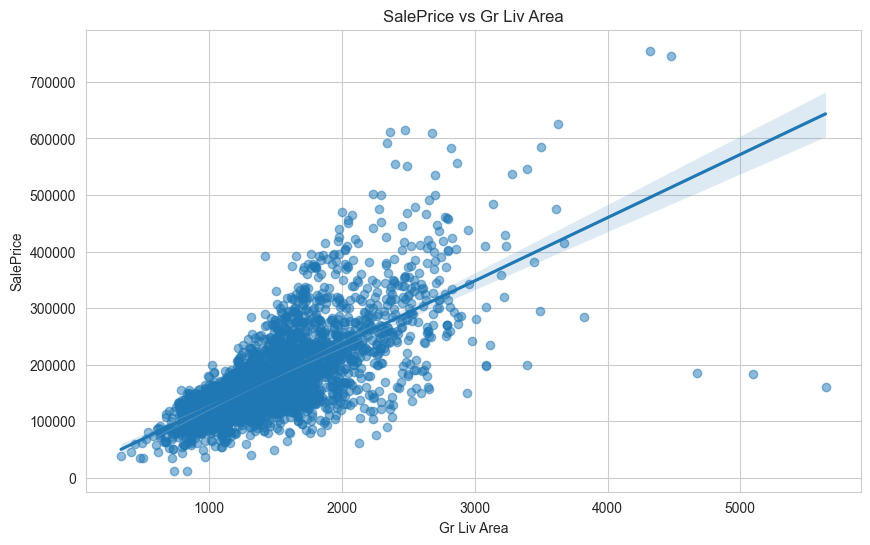

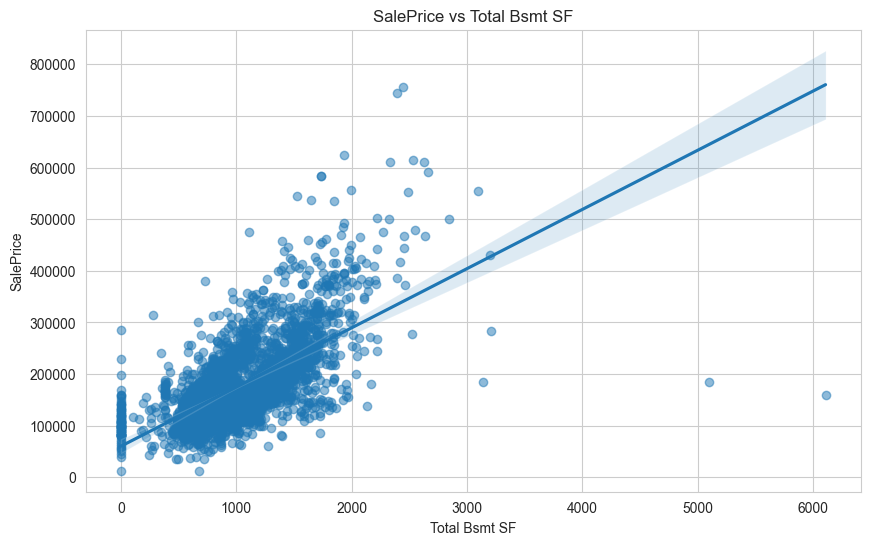

In [6]:
#Scatter plot with trend line SalePrice vs Ground Living Area
vz.plot_scatter(
    house_df,
    x_col="Gr Liv Area",
    y_col="SalePrice",
    regression=True,
    save_path="../reports/figures/saleprice_vs_grlivarea.png"
)

#Scatter plot with trend line: SalePrice vs Total Basement Area
vz.plot_scatter(
    house_df,
    x_col="Total Bsmt SF",
    y_col="SalePrice",
    regression=True,
    save_path="../reports/figures/saleprice_vs_totalbsmtsf.png"
)

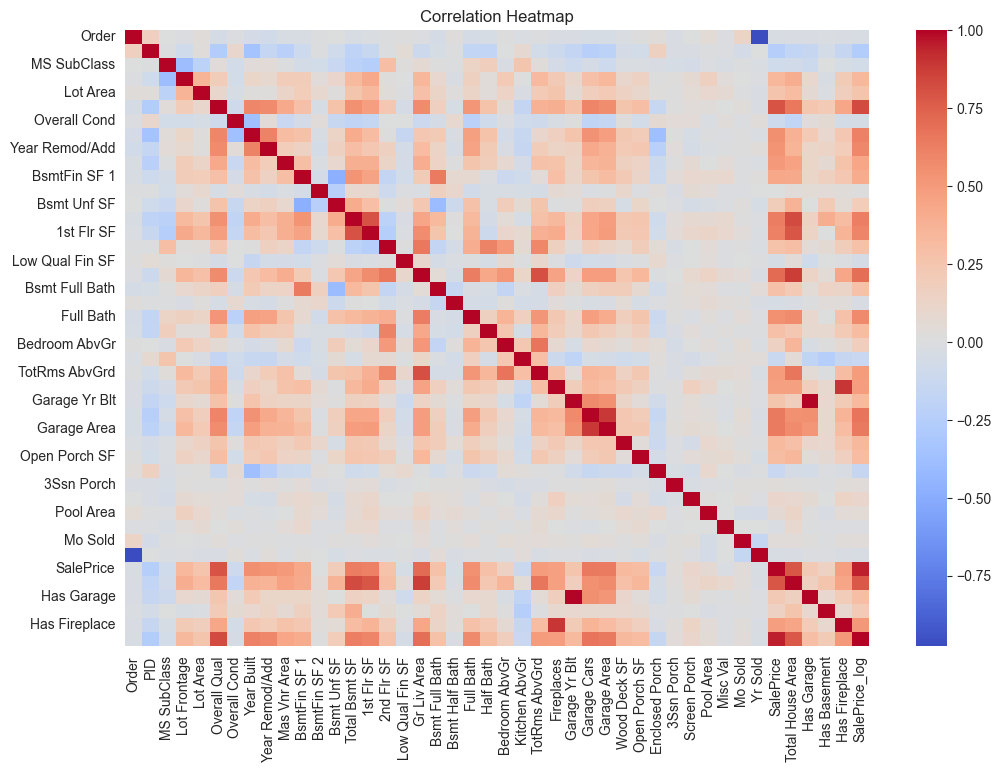

In [7]:
#Visualize correlations using a heatmap
vz.plot_heatmap(
    house_df,
    save_path="../reports/figures/correlation_heatmap.png"
)

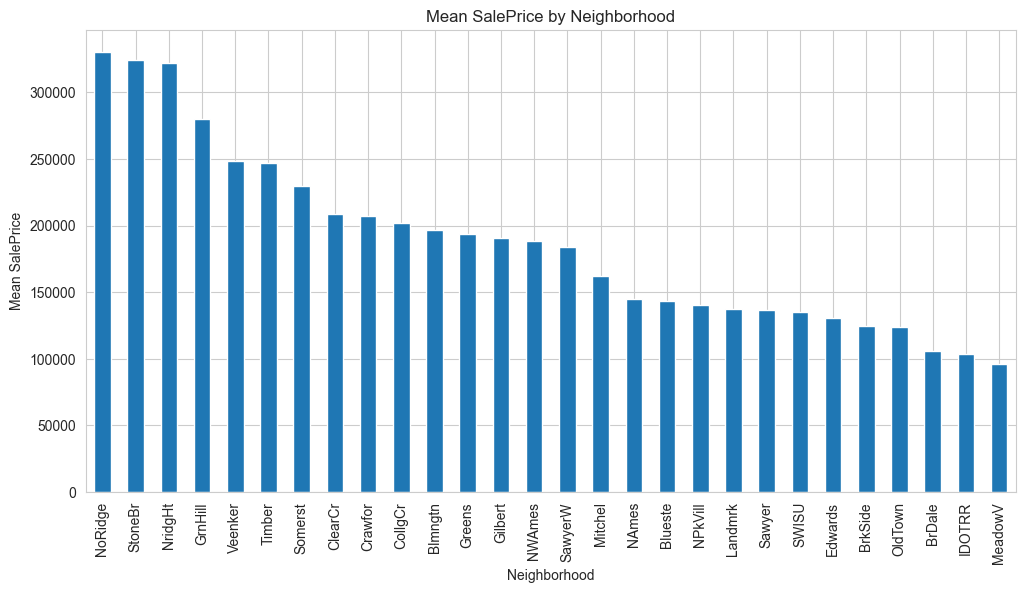

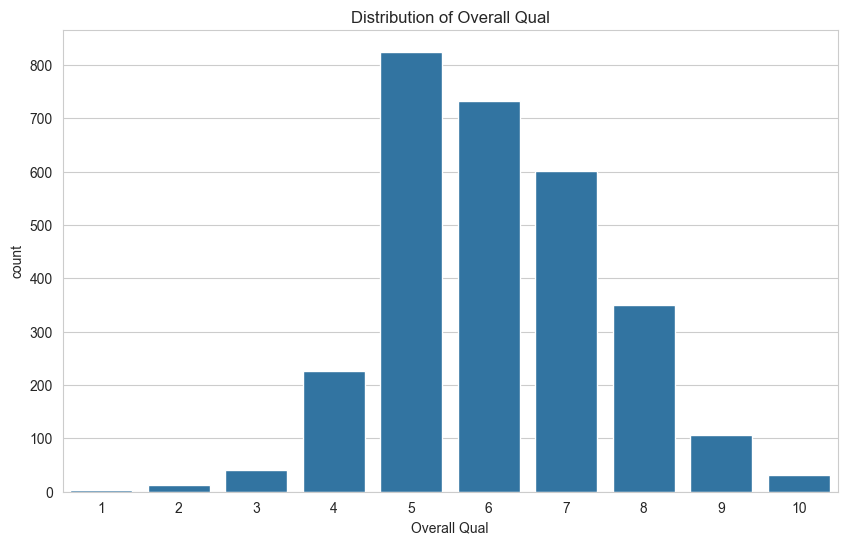

In [8]:
#Calculate average SalePrice by Neighborhood
neighborhood_price = (
    house_df.groupby("Neighborhood")["SalePrice"]
    .mean()
    .sort_values(ascending=False)
)

#Bar chart of average SalePrice by Neighborhood
vz.plot_bar(
    house_df,
    x_col="Neighborhood",
    y_col="SalePrice",
    agg_func="mean",
    save_path="../reports/figures/avg_saleprice_by_neighborhood.png"
)

#Count plot for Overall Quality ratings
vz.plot_count(
    house_df,
    column="Overall Qual",
    save_path="../reports/figures/overall_quality_distribution.png"
)

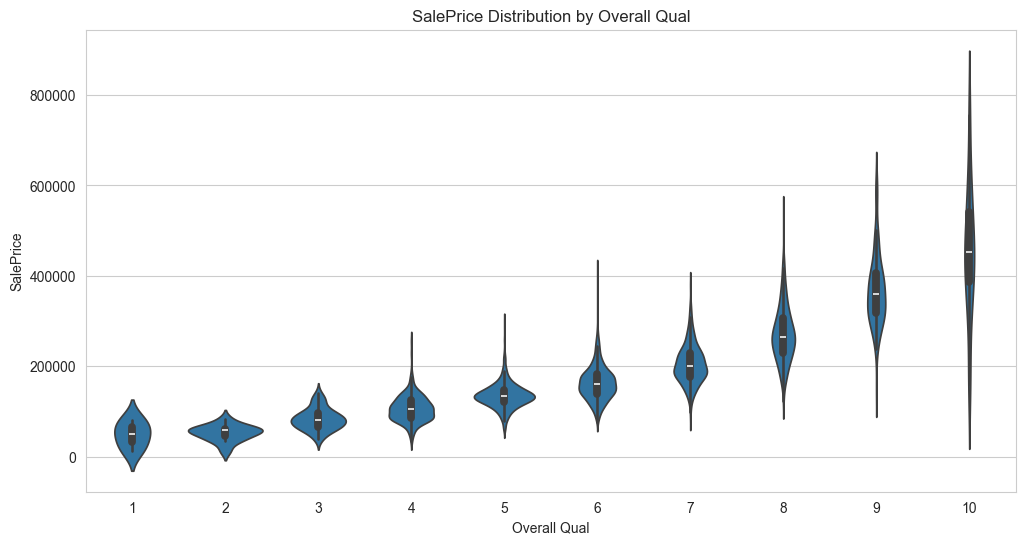

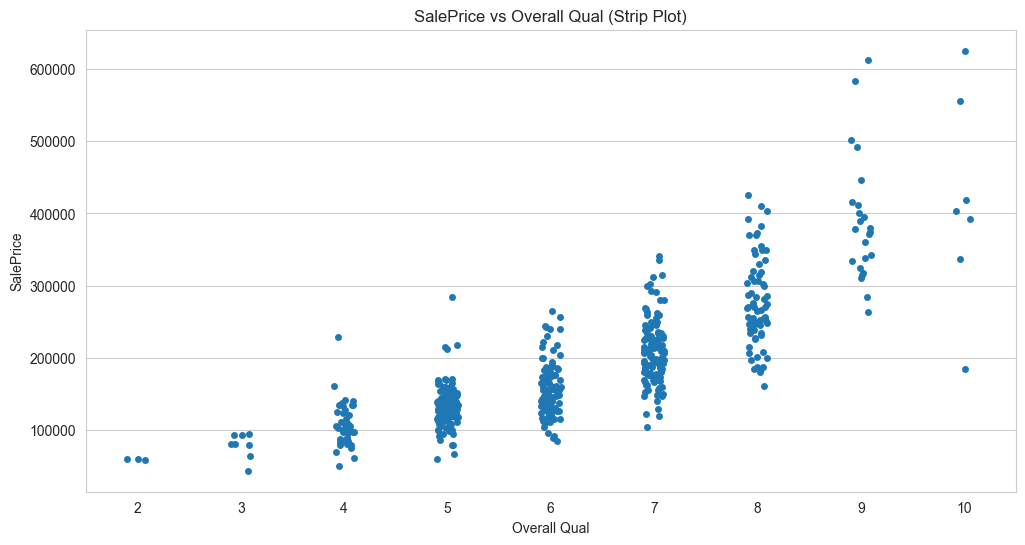

In [9]:
#Violin plot to analyze SalePrice distribution across overall quality levels
vz.plot_violin(
    house_df,
    x_col="Overall Qual",
    y_col="SalePrice",
    save_path="../reports/figures/violin_saleprice_by_quality.png"
)

#Strip plot sampled to avoid overcrowding
vz.plot_strip(
    house_df,
    x_col="Overall Qual",
    y_col="SalePrice",
    sample_size=500,
    save_path="../reports/figures/swarm_saleprice_by_quality.png"
)

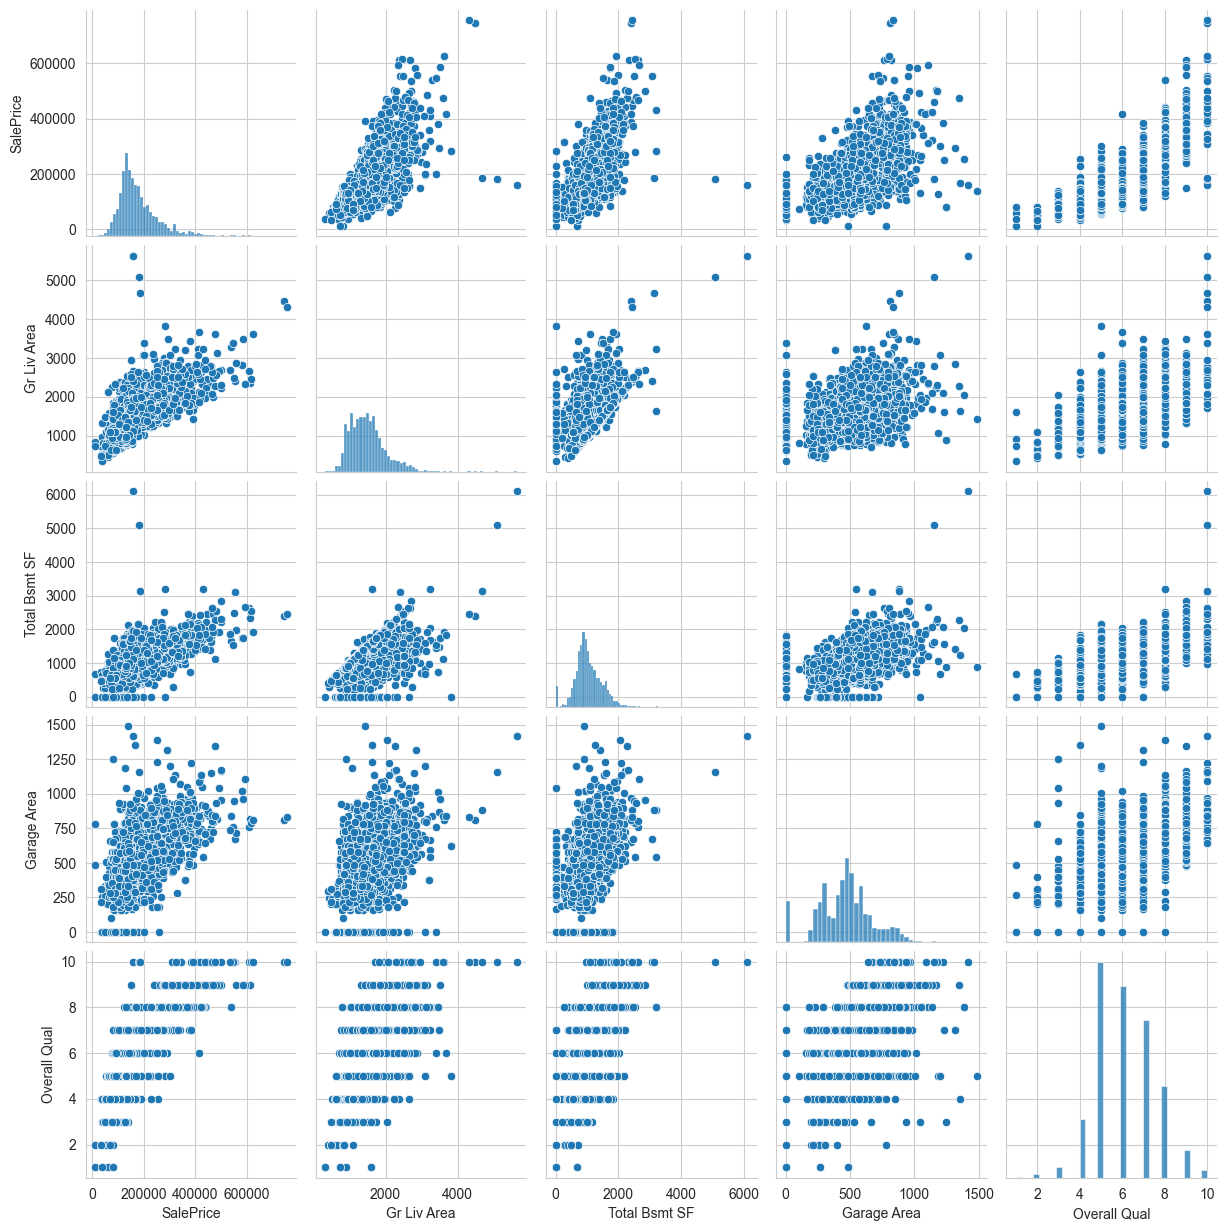

In [10]:
# Select key numerical features for pair plot
selected_features = [
    "SalePrice",
    "Gr Liv Area",
    "Total Bsmt SF",
    "Garage Area",
    "Overall Qual"
]

# Generate pair plot to observe multivariate relationships
vz.plot_pair(
    house_df[selected_features],
    columns=selected_features,
    save_path="../reports/figures/pairplot_key_features.png"
)

In [11]:
# Calculate interquartile range for SalePrice
Q1 = house_df["SalePrice"].quantile(0.25)
Q3 = house_df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR rule
outliers = house_df[
    (house_df["SalePrice"] < Q1 - 1.5 * IQR) |
    (house_df["SalePrice"] > Q3 + 1.5 * IQR)
]

print(f"\nNumber of detected SalePrice outliers: {outliers.shape[0]}")


Number of detected SalePrice outliers: 137
